<a href="https://colab.research.google.com/github/anteaterst/Data_analytics-1109-1209/blob/main/sklearn_practice_face%2C_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

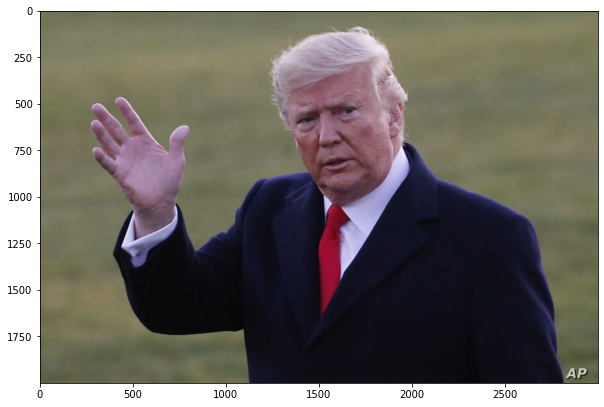

In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('ota.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img) 

In [15]:
import requests

client_id = "GYoAcBBUgag6SH0WTJsn"
client_secret = "wm1JRGqTkO"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('ota.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret' : client_secret}

#네이버로 보내기
response = requests.post(url, files=files, headers=headers)

In [17]:
import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4,sort_keys=False, ensure_ascii=False))

# json.dumps 를 이용하면 보기 좋게 변환해준다 
# ensure_ascii=False 는 한글로 표기할 수 있게 해줌

{
    "info": {
        "size": {
            "width": 2999,
            "height": 2000
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "트럼프",
                "confidence": 0.646792
            }
        }
    ]
}


In [30]:
import requests

client_id = "GYoAcBBUgag6SH0WTJsn"
client_secret = "wm1JRGqTkO"

url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('ota.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret' : client_secret}

#네이버로 보내기
response = requests.post(url, files=files, headers=headers)

In [33]:
import json

result = json.loads(response.text)

result.keys()


dict_keys(['info', 'faces'])

In [34]:
result['faces'][0]

{'age': {'confidence': 0.182758, 'value': '81~85'},
 'emotion': {'confidence': 0.977197, 'value': 'neutral'},
 'gender': {'confidence': 0.999876, 'value': 'male'},
 'landmark': {'leftEye': {'x': 1465, 'y': 565},
  'leftMouth': {'x': 1497, 'y': 828},
  'nose': {'x': 1517, 'y': 683},
  'rightEye': {'x': 1642, 'y': 536},
  'rightMouth': {'x': 1684, 'y': 795}},
 'pose': {'confidence': 0.918775, 'value': 'frontal_face'},
 'roi': {'height': 539, 'width': 539, 'x': 1356, 'y': 429}}

In [53]:
result['faces'][0]['roi']

{'height': 539, 'width': 539, 'x': 1356, 'y': 429}

In [52]:
result['faces'][0]['age']

{'confidence': 0.182758, 'value': '81~85'}

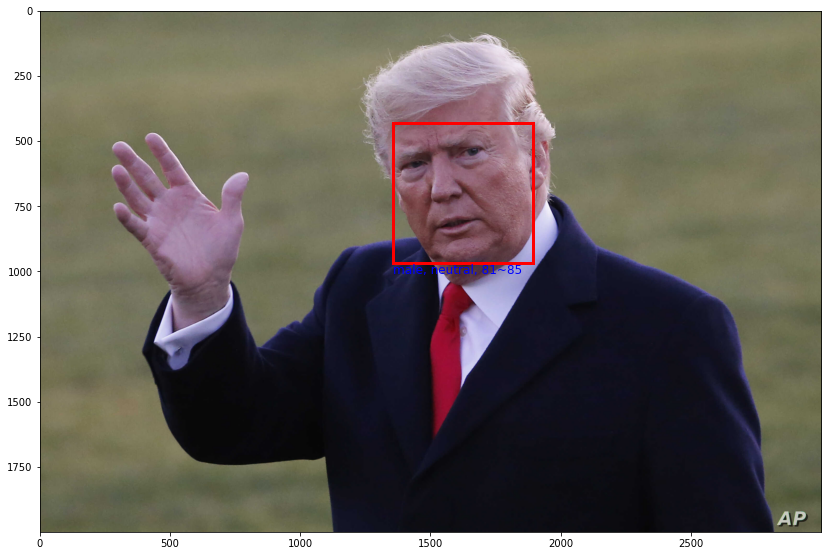

In [63]:
import matplotlib.pyplot as plt




import matplotlib.patches as patches

img = mpimg.imread('ota.jpg')
fig,ax = plt.subplots(figsize = (14,10))
ax.imshow(img)
for each in result['faces'] : # 사진의 인원수 faces 만큼 반복
  x, y, w, h = each['roi'].values()
  gender, gen_conf = each['gender'].values()
  emotion , emo_conf = each['emotion'].values()
  age, age_conf = each['age'].values()

  rect_face = patches.Rectangle((x,y),w,h, linewidth=3,
                                edgecolor='r',facecolor='none')
  ant_letter = gender + ', ' + emotion + ', ' + age
  plt.text(x, y+h+40, ant_letter, size=12, color = 'blue')
  ax.add_patch(rect_face)


In [ ]:

# 인공지능 분석 모듈 (tensor flow 와 같은 머신러닝 인공지능 모듈)
# pip install sklearn

In [73]:
from sklearn.datasets import load_iris

iris = load_iris()

In [74]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [75]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [79]:
import seaborn as sns # seaborn에도 iris 데이터가 포함되어 있다 

In [81]:
siris = sns.load_dataset('iris')

In [82]:
siris

# sepal_length 꽃받침 길이
# sepal_width 꽃받침 너비

# petal_length  꽃잎 길이
# petal_width  꽃잎 너비


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


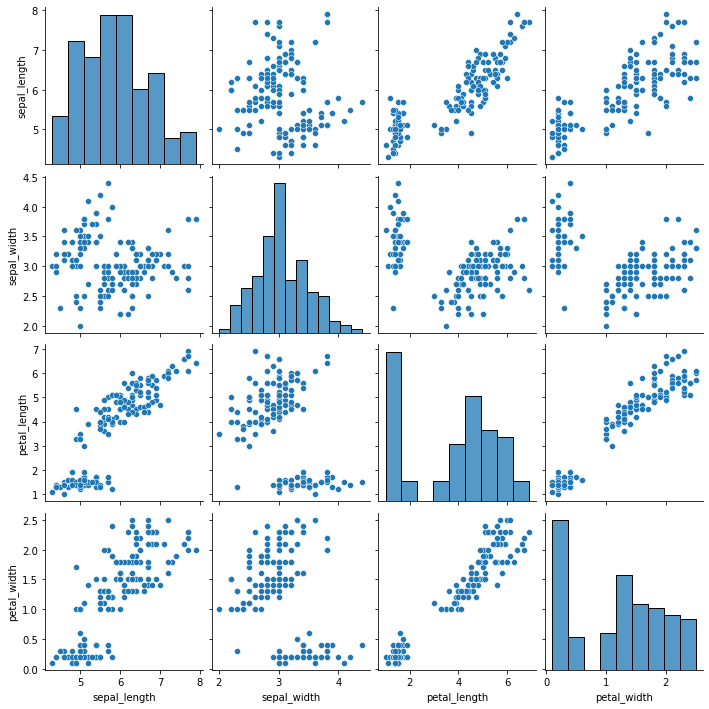

In [83]:
sns.pairplot(siris)

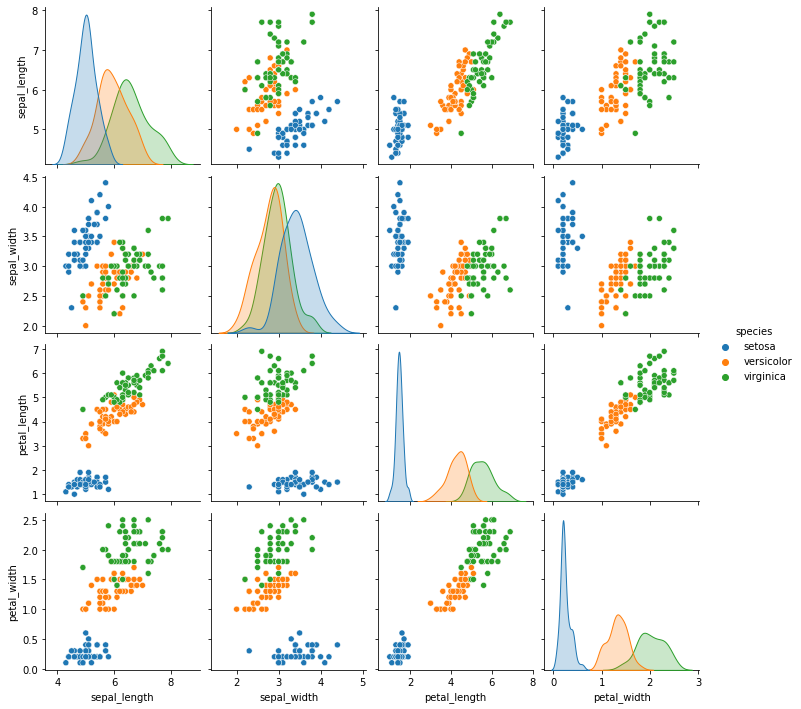

In [86]:
sns.pairplot(siris, hue='species')

In [90]:
# graphviz 시각화 도구는 생략 

from sklearn.tree import DecisionTreeClassifier  # 결정 나무 알고리즘을 사용한다. 

x = iris.data[:,2:] #모든 행에서 2번 째 칼럼 데이터 부터 사용한다
y = iris.target

# petal 의 width와 length [모든행,컬럼]

In [91]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=13)
tree_clf.fit(x,y) #몇 단계까지 진입 할 것인가 max_dapth , 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [92]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [95]:
iris.target_names[tree_clf.predict([[5, 1.5]])]

array(['versicolor'], dtype='<U10')

In [96]:
tree_clf.predict([[5, 1.5]])

array([1])

In [99]:
iris.target_names[tree_clf.predict([[2,2]])]


array(['setosa'], dtype='<U10')

In [100]:
tree_clf.predict_proba([[2,2]])

array([[1., 0., 0.]])